# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:green"> Matteucci Massimiliano 932234 </span>
## <span style="color:green"> Esercitazione1 </span>
### <span style="color:green"> Esercizio1.1 </span>

Stimiamo il valore di $\langle r \rangle = \int_0^1 r dr = 1/2$ estraendo i punti con una distribuzione uniforme 
sull' intervallo 0-1.
L'errore sulla stima è dato dall'incertezza statistica calcolata con il metodo a blocchi.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

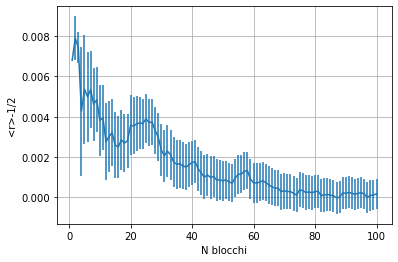

In [3]:
myfile = open("Esercizio1\\Dati.dat")

y = np.loadtxt("Esercizio1\\Dati.dat", usecols=(0), delimiter=' ', unpack='true')
N=y.size
x = np.arange(N)+1
yerr = np.loadtxt("Esercizio1\\Dati.dat", usecols=(1), delimiter=' ', unpack='true')

plt.errorbar(x,y-0.5,yerr)
plt.xlabel('N blocchi')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

### <span style="color:green"> Esercizio1.2 </span>

Stimiamo il valore di $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. estraendo i punti con una distribuzione uniforme 
sull' intervallo 0-1.
L'errore sulla stima è dato dall'incertezza statistica calcolata con il metodo a blocchi.

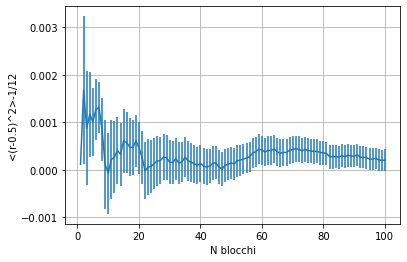

In [4]:
myfile = open("Esercizio1.2\\Dati.dat")

y = np.loadtxt("Esercizio1.2\\Dati.dat", usecols=(0), delimiter=' ', unpack='true')
N=y.size
x = np.arange(N)+1
yerr = np.loadtxt("Esercizio1.2\\Dati.dat", usecols=(1), delimiter=' ', unpack='true')

plt.errorbar(x,y-1./12,yerr)
plt.xlabel('N blocchi')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

Osserviamo che in entrambe le stime degli integrali la stima tende al valore vero con una diminuzione dell'errore come preventivato dal metodo a blocchi

### <span style="color:green"> Esercizio1.3 </span>

Controlliamo la qualità del nostro generatore di numeri casuali uniformi utilizzando il test del $\chi^2$.

media =  99.76379999999997


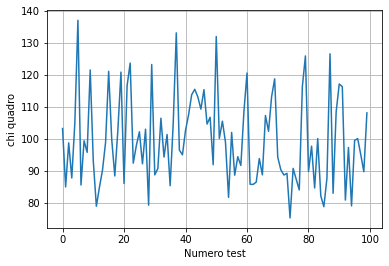

In [8]:
myfile = open("Esercizio1.3\\Dati.dat")

y = np.loadtxt("Esercizio1.3\\Dati.dat", usecols=(0), delimiter=' ', unpack='true')
N=y.size
x = np.arange(N)

print('media = ',y.mean())

plt.plot(x,y)
plt.xlabel('Numero test')
plt.ylabel('chi quadro')
plt.grid(True)
plt.show()

Dal grafico possiamo osservare come alcune sequenze di 10^4 numeri estratti casualmente sono più uniformi rispetto ad altre estratte sempre con lo stesso algoritmo (maggiore il valore di chi quadro meno uniforme la sequenza).
In media otteniamo un valore di $\chi^2 \simeq 100$ come ci si aspettava.

### <span style="color:green"> Esercizio2 </span>

Verifichiamo sperimentalmente il teorema del limite centrale.

In [9]:
x = np.loadtxt("Esercizio2//DatiN=1.dat", usecols=(0), delimiter=' ', unpack='true')
y = np.loadtxt("Esercizio2//DatiN=2.dat", usecols=(0), delimiter=' ', unpack='true')
z = np.loadtxt("Esercizio2//DatiN=10.dat", usecols=(0), delimiter=' ', unpack='true')
k = np.loadtxt("Esercizio2//DatiN=100.dat", usecols=(0), delimiter=' ', unpack='true')

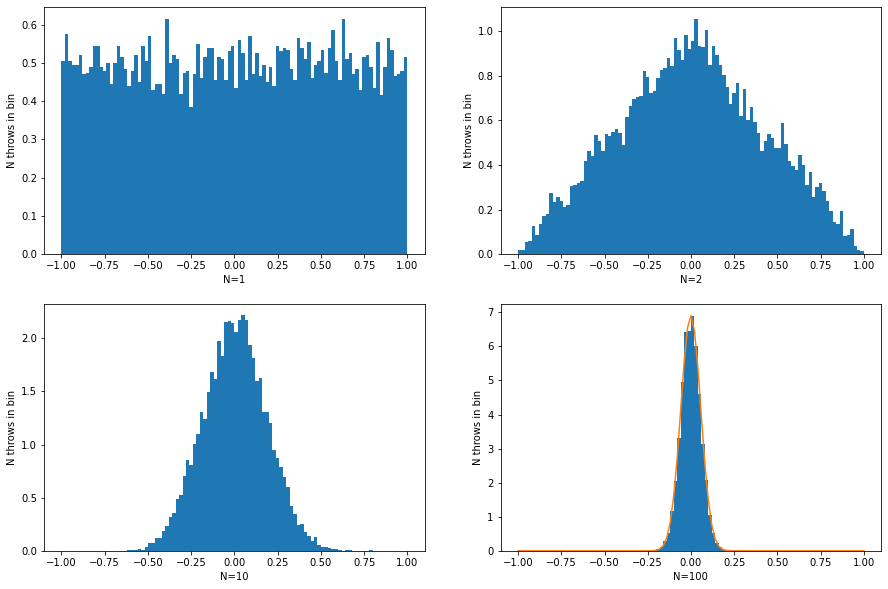

In [22]:
from scipy.stats import norm
import matplotlib.pyplot as plt

n_bins = 100

fig= plt.figure(figsize=(15,10))
plt.title('Sn con Disitribuzione Uniforme')
plt.subplot(2,2,1)
plt.xlabel('N=1')
plt.ylabel('N throws in bin')
plt.hist(x, n_bins, density=True, range=(-1,1))

plt.subplot(2,2,2)
plt.xlabel('N=2')
plt.ylabel('N throws in bin')
plt.hist(y, n_bins, density=True, range=(-1,1))

plt.subplot(2,2,3)
plt.xlabel('N=10')
plt.ylabel('N throws in bin')
plt.hist(z, n_bins, density=True, range=(-1,1))

plt.subplot(2,2,4)
plt.xlabel('N=100')
plt.ylabel('N throws in bin')

_,bins,_=plt.hist(k, n_bins, density=True, range=(-1,1))
mu, sigma=scipy.stats.norm.fit(k)
best_fit_line =scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,best_fit_line)
plt.show()

Come ci si aspetta dal teorema del limite centrale andando ad aumentare la N la pdf di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$, con $x_i$ estratti con una distribuzione di probabilità uniforme, tende ad una gaussiana. 

In [23]:
x = np.loadtxt("Esercizio2//DatiN=1.dat", usecols=(1), delimiter=' ', unpack='true')
y = np.loadtxt("Esercizio2//DatiN=2.dat", usecols=(1), delimiter=' ', unpack='true')
z = np.loadtxt("Esercizio2//DatiN=10.dat", usecols=(1), delimiter=' ', unpack='true')
k = np.loadtxt("Esercizio2//DatiN=100.dat", usecols=(1), delimiter=' ', unpack='true')



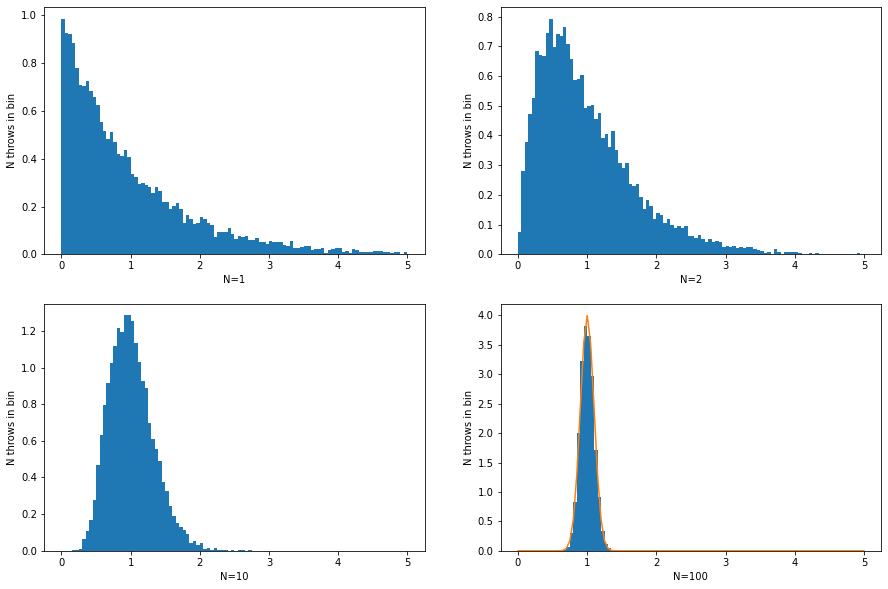

In [24]:
n_bins = 100

fig= plt.figure(figsize=(15,10))
plt.title('Sn con Disitribuzione Esponenziale')
plt.subplot(2,2,1)
plt.xlabel('N=1')
plt.ylabel('N throws in bin')
plt.hist(x, n_bins, density=True, range=(0,5))

plt.subplot(2,2,2)
plt.xlabel('N=2')
plt.ylabel('N throws in bin')
plt.hist(y, n_bins, density=True, range=(0,5))

plt.subplot(2,2,3)
plt.xlabel('N=10')
plt.ylabel('N throws in bin')
plt.hist(z, n_bins, density=True, range=(0,5))

plt.subplot(2,2,4)
plt.xlabel('N=100')
plt.ylabel('N throws in bin')
_,bins,_=plt.hist(k, n_bins, density=True, range=(0,5))
mu, sigma=scipy.stats.norm.fit(k)
best_fit_line =scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,best_fit_line)
plt.show()

Anche nel caso della distribuzione esponenziale si osserva un buon fit con una gaussiana in N=100.

In [26]:
x = np.loadtxt("Esercizio2//DatiN=1.dat", usecols=(2), delimiter=' ', unpack='true')
y = np.loadtxt("Esercizio2//DatiN=2.dat", usecols=(2), delimiter=' ', unpack='true')
z = np.loadtxt("Esercizio2//DatiN=10.dat", usecols=(2), delimiter=' ', unpack='true')
k = np.loadtxt("Esercizio2//DatiN=100.dat", usecols=(2), delimiter=' ', unpack='true')

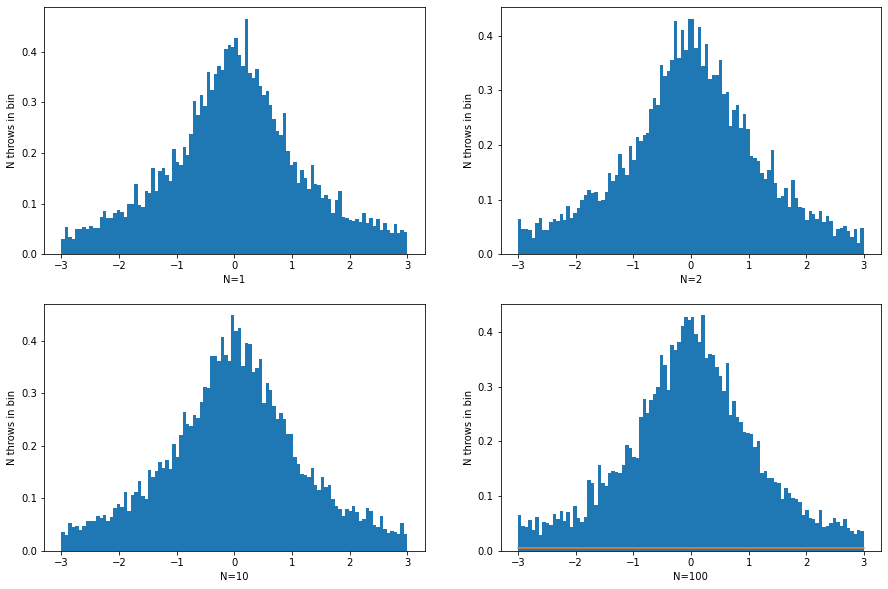

In [27]:
n_bins = 100

fig= plt.figure(figsize=(15,10))
plt.title('Sn con Disitribuzione Lorentziana')
plt.subplot(2,2,1)
plt.xlabel('N=1')
plt.ylabel('N throws in bin')
plt.hist(x, n_bins, density=True, range=(-3,3))

plt.subplot(2,2,2)
plt.xlabel('N=2')
plt.ylabel('N throws in bin')
plt.hist(y, n_bins, density=True, range=(-3,3))

plt.subplot(2,2,3)
plt.xlabel('N=10')
plt.ylabel('N throws in bin')
plt.hist(z, n_bins, density=True, range=(-3,3))

plt.subplot(2,2,4)
plt.xlabel('N=100')
plt.ylabel('N throws in bin')
_,bins,_=plt.hist(k, n_bins, density=True, range=(-3,3))
mu, sigma=scipy.stats.norm.fit(k)
best_fit_line =scipy.stats.norm.pdf(bins,mu,sigma)
plt.plot(bins,best_fit_line)

plt.show()

Estraendo la variabili con una distribuzione Lorentziana si vede la pdf di $S_N$ non converge ad una gaussiana difatti non presenta una varianza finita condizione necessaria per applicare il teorema del limite centrale

### <span style="color:green"> Esercizio3 </span>

Simuliamo l'esperimento di Buffon per calcolare $\pi$

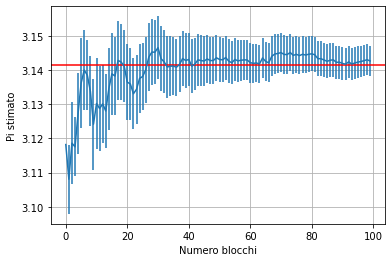

In [68]:
myfile = open("Esercizio3\\Dati.dat")

y = np.loadtxt("Esercizio3\\Dati.dat", usecols=(0), delimiter=' ', unpack='true')
N=y.size
x = np.arange(N)
yerr = np.loadtxt("Esercizio3\\Dati.dat", usecols=(1), delimiter=' ', unpack='true')

plt.errorbar(x,y,yerr)
plt.xlabel('Numero blocchi')
plt.ylabel('Pi stimato')
plt.axhline(3.141592,color='r')
plt.grid(True)
plt.show()